In [3]:
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv(r'D:\2_letter_recognition.data',  sep = ",")

In [5]:
dataset

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
X = dataset.iloc[:, 1 : 17]
Y = dataset.select_dtypes(include = [object])

In [7]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [9]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')

In [13]:
pip install yellowbrick

c:\python10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python10\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\python10\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


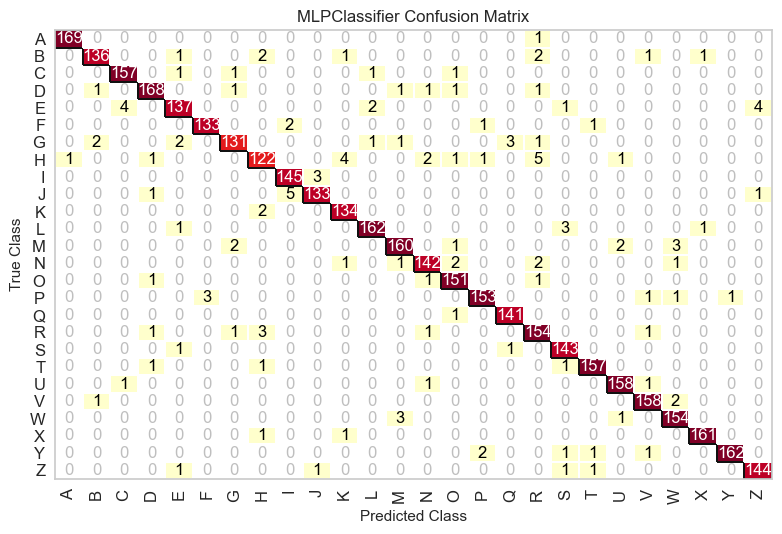

In [12]:
from yellowbrick.classifier import confusion_matrix
cm = confusion_matrix(mlp,X_train,Y_train, X_validation, Y_validation, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

In [14]:
cm.fit(X_train, Y_train.values.ravel())

ConfusionMatrix(ax=<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x000001FD314D5F90>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
cm.score(X_validation, Y_validation)

c:\python10\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.96625

In [17]:
predictions = cm.predict(X_validation)
predictions

array(['C', 'I', 'D', ..., 'R', 'B', 'W'], dtype='<U1')

In [18]:
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.96625
